#### Veri kullanım izni verdiği için dünyahalleri.com'a teşekkürler.

# İçerik
* [Gerekli Kütüphaneler](#Gerekli-Kütüphaneler)
* [Veri Seti](#Kullandığımız-veri-setinin-özellikleri)
* [Metin Temizleme](#Metin-Temizleme)
* [Metin Görselleştirme](#Elimizdeki-Metni-Görselleştirme)
* [Kelime Frekansı Algoritması](#Kelime-Frekansı-Algoritması)
* [TextRank Algoritması](#TextRank-Algoritması)

# Gerekli Kütüphaneler

In [27]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import heapq
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import KeyedVectors
import networkx as nx

## Benzerlik Fonksiyonları

In [29]:
def get_jaccard_sim(str1, str2): 
    a = set(str1[0].split(" ")) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [30]:
def get_jaccard_sim_2(str1, str2): 
    a = set(str1.split(" ")) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

## Kullandığımız veri setinin özellikleri

In [31]:
all_news = pd.read_pickle("crawled_data.pickle")

In [32]:
all_news

,Link,Header,Body_Text,Timestamps
0,https://www.dunyahalleri.com/haftanin-ozeti-249/,Haftanın Özeti: 249,Dünyada bir yanda açlık çeken insanlar diğer y...,04/08/2019
1,https://www.dunyahalleri.com/haftanin-ozeti-248/,Haftanın Özeti: 248,İngiltere’de Eski Başbakan Theresa May’in Brex...,28/07/2019
2,https://www.dunyahalleri.com/haftanin-ozeti-247/,Haftanın Özeti: 247,Ukrayna’da yeni kabul edilen yasaya göre tecav...,21/07/2019
3,https://www.dunyahalleri.com/haftanin-ozeti-246/,Haftanın Özeti: 246,Hong Kong’da haftalardır sokaklarda protesto g...,14/07/2019
4,https://www.dunyahalleri.com/haftanin-ozeti-245/,Haftanın Özeti: 245,Kaliforniya merkezli Ocean Voyages adlı kar am...,07/07/2019
...,...,...,...,...
145,https://www.dunyahalleri.com/haftanin-ozeti-103/,Haftanın Özeti: 103,Gazlı içecek şirketlerinin lobicilik faaliyetl...,16/10/2016
146,https://www.dunyahalleri.com/haftanin-ozeti-102/,Haftanın Özeti: 102,Çek Cumhuriyeti’ndeki Hranicka Propast mağaras...,09/10/2016
147,https://www.dunyahalleri.com/haftanin-ozeti-101/,Haftanın Özeti: 101,Şüphesiz ki bilimsel merak ve araştırmanın ger...,02/10/2016
148,https://www.dunyahalleri.com/haftanin-ozeti-100/,Haftanın Özeti: 100,Grip aşısı hakkındaki iddialar diğer tüm aşıla...,25/09/2016


In [33]:
all_news['Tokenized_Text'] = all_news['Body_Text'].apply(word_tokenize)
all_news['Tokenized_Sentence'] = all_news['Body_Text'].apply(sent_tokenize)

## Metin Temizleme

In [34]:
stop_words = stopwords.words('Turkish')
stop_words.append("bir")
corpus = []
for news in all_news['Tokenized_Text']:
    temp_list = []
    for word in news:
        if ((word.lower() not in stop_words) and (len(word) > 2)):
            temp_list.append(word)
    corpus.append(temp_list[:-22])    

## Elimizdeki Metni Görselleştirme

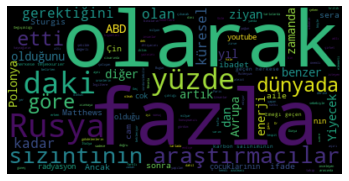

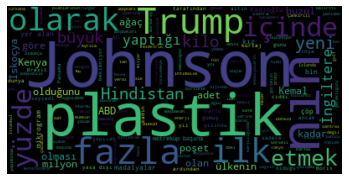

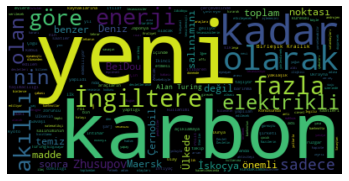

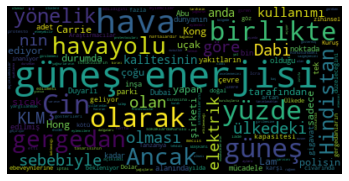

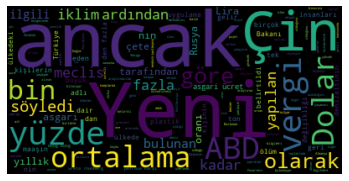

In [35]:
for i in range(5):
    cloud_for_text = WordCloud().generate(' '.join(corpus[i]))
    plt.imshow(cloud_for_text, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [36]:
all_news['Summarized_Text'] = ""
for i in range(all_news.shape[0]):
    all_news['Summarized_Text'][i] = summarize_func(all_news['Tokenized_Text'][i],all_news['Tokenized_Sentence'][i])

In [37]:
all_news.head()

,Link,Header,Body_Text,Timestamps,Tokenized_Text,Tokenized_Sentence,Summarized_Text
0,https://www.dunyahalleri.com/haftanin-ozeti-249/,Haftanın Özeti: 249,Dünyada bir yanda açlık çeken insanlar diğer y...,04/08/2019,"[Dünyada, bir, yanda, açlık, çeken, insanlar, ...",[Dünyada bir yanda açlık çeken insanlar diğer ...,"[Bunun sebebi de İtalya’nın, çeşitli deneyler ..."
1,https://www.dunyahalleri.com/haftanin-ozeti-248/,Haftanın Özeti: 248,İngiltere’de Eski Başbakan Theresa May’in Brex...,28/07/2019,"[İngiltere, ’, de, Eski, Başbakan, Theresa, Ma...",[İngiltere’de Eski Başbakan Theresa May’in Bre...,[Boris Johnson da Osman Kemal’in oğlu Stanley ...
2,https://www.dunyahalleri.com/haftanin-ozeti-247/,Haftanın Özeti: 247,Ukrayna’da yeni kabul edilen yasaya göre tecav...,21/07/2019,"[Ukrayna, ’, da, yeni, kabul, edilen, yasaya, ...",[Ukrayna’da yeni kabul edilen yasaya göre teca...,"[Yani Maersk’in karbon salınımı, Bolivya, Lübn..."
3,https://www.dunyahalleri.com/haftanin-ozeti-246/,Haftanın Özeti: 246,Hong Kong’da haftalardır sokaklarda protesto g...,14/07/2019,"[Hong, Kong, ’, da, haftalardır, sokaklarda, p...",[Hong Kong’da haftalardır sokaklarda protesto ...,[Güneş parkı alanında en yüksek kapasiteli gün...
4,https://www.dunyahalleri.com/haftanin-ozeti-245/,Haftanın Özeti: 245,Kaliforniya merkezli Ocean Voyages adlı kar am...,07/07/2019,"[Kaliforniya, merkezli, Ocean, Voyages, adlı, ...",[Kaliforniya merkezli Ocean Voyages adlı kar a...,"[Türkiye’de, 2019 yılı itibarıyla yıllık 148 b..."


## Kelime Frekansı Algoritması 

In [28]:
def summarize_func(words,sentences):
    word2count = {}
    for word in words:
        if word.lower() not in word2count.keys():
            word2count[word.lower()] = 1
        else:
            word2count[word.lower()] += 1
        
    maxi = max(word2count.values())
    
    for key in word2count.keys():
        word2count[key] = word2count[key]/maxi
        
    sent2score = {}
    for sentence in sentences:
        for word in word_tokenize(sentence.lower()):
            if word in word2count.keys():
                if len(sentence.split(' ')) < 15:
                    if sentence not in sent2score.keys():
                        sent2score[sentence] = word2count[word]
                    else:
                        sent2score[sentence] += word2count[word]
                        
    best_sentences = heapq.nlargest(5, sent2score, key=sent2score.get)
    return[' '.join(best_sentences)]

## Kelime Frekansına göre özetleme denemeleri

In [38]:
text = """Bir iklim bilimcinin açıklamasına göre, aşırı küresel sıcaklıklar insan vücudunu termal sınırlara doğru itiyor.

Geçtiğimiz hafta Avrupa genelinde rekor sıcaklıklara şahit olundu. Birkaç ülkede sıcaklık 40 derecenin üstüne çıktı. Öte yandan Güney Asya ve Basra Körfezi gibi yerlerde yaşayan insanlar 54 derecelere varan sıcaklıklarla mücadele ediyor. Loughborough Üniversitesi’nde iklim bilimci olarak çalışan Dr. Tom Matthews “İnsan vücudundaki tüm ısıl verime rağmen Güney Asya ve Basra Körfezi gibi yerler yakın zamanda yaşanmaz hale gelebilir.” dedi.

Hava sıcaklığı 35 dereceyi geçtiğinde vücut, vücut ısısını güvenli seviyede tutmak için terler. Ancak nemin buharlaşabilme yetisini gösteren ıslak sıcaklık 35 dereceyi aştığında bu sistem çalışmaz hale gelir. Dr. Matthews “Islak sıcaklık, termometreden buharlaşan suyun soğuma etkisini de içerir. Bu yüzden doğal olarak hava durumlarında verilen normal (kuru ampul sıcaklığı) sıcaklıktan daha düşük olur. Bu ıslak sıcaklık eşiği aşıldığında, hava o kadar çok su buharıyla dolar ki ter buharlaşmaz hale gelir.” diyor.

Bu da, insan vücudunun kendini birkaç saatten fazla hayatta kalabilecek kadar soğutamayacağı anlamına geliyor. Matthews’a göre 21. yüzyılın sonunda Dünya üzerindeki en yoğun nüfuslu yerlerden bazıları da dahil olmak üzere kimi bölgeler bu eşiği geçecek. İklim değişikliğinin hava sistemlerini derinden etkilemeye başlamasıyla, artan sıcaklıklar yakında dünyanın bazı yerlerini yaşanmaz hale getirebilir. Eğer elektrik sistemi düzgün işletilirse kronik şekilde sıcaktan etkilenen ülkelerde yaşamak mümkün olabilir ancak elektrik kesintisi olması durumunda felaket yaşanır. Bu yüzden Dr. Matthews’a göre konuyla ilgili en sağlıklı hamle, Paris İklim Değişikliği Anlaşması’yla belirlenen sınırları korumak adına seragazı salınımını kesmek."""
text

'Bir iklim bilimcinin açıklamasına göre, aşırı küresel sıcaklıklar insan vücudunu termal sınırlara doğru itiyor.\n\nGeçtiğimiz hafta Avrupa genelinde rekor sıcaklıklara şahit olundu. Birkaç ülkede sıcaklık 40 derecenin üstüne çıktı. Öte yandan Güney Asya ve Basra Körfezi gibi yerlerde yaşayan insanlar 54 derecelere varan sıcaklıklarla mücadele ediyor. Loughborough Üniversitesi’nde iklim bilimci olarak çalışan Dr. Tom Matthews “İnsan vücudundaki tüm ısıl verime rağmen Güney Asya ve Basra Körfezi gibi yerler yakın zamanda yaşanmaz hale gelebilir.” dedi.\n\nHava sıcaklığı 35 dereceyi geçtiğinde vücut, vücut ısısını güvenli seviyede tutmak için terler. Ancak nemin buharlaşabilme yetisini gösteren ıslak sıcaklık 35 dereceyi aştığında bu sistem çalışmaz hale gelir. Dr. Matthews “Islak sıcaklık, termometreden buharlaşan suyun soğuma etkisini de içerir. Bu yüzden doğal olarak hava durumlarında verilen normal (kuru ampul sıcaklığı) sıcaklıktan daha düşük olur. Bu ıslak sıcaklık eşiği aşıldığınd

In [39]:
summary = summarize_func(word_tokenize(text),sent_tokenize(text))
summary

['Bu da, insan vücudunun kendini birkaç saatten fazla hayatta kalabilecek kadar soğutamayacağı anlamına geliyor. Hava sıcaklığı 35 dereceyi geçtiğinde vücut, vücut ısısını güvenli seviyede tutmak için terler. Dr. Matthews “Islak sıcaklık, termometreden buharlaşan suyun soğuma etkisini de içerir. Bir iklim bilimcinin açıklamasına göre, aşırı küresel sıcaklıklar insan vücudunu termal sınırlara doğru itiyor. Birkaç ülkede sıcaklık 40 derecenin üstüne çıktı.']

In [40]:
cleaned_text = [word for word in word_tokenize(text) if (word not in stop_words and len(word) > 2)]

In [41]:
summary = summarize_func(cleaned_text,sent_tokenize(text))
summary

['Bir iklim bilimcinin açıklamasına göre, aşırı küresel sıcaklıklar insan vücudunu termal sınırlara doğru itiyor. Hava sıcaklığı 35 dereceyi geçtiğinde vücut, vücut ısısını güvenli seviyede tutmak için terler. Dr. Matthews “Islak sıcaklık, termometreden buharlaşan suyun soğuma etkisini de içerir. Bu da, insan vücudunun kendini birkaç saatten fazla hayatta kalabilecek kadar soğutamayacağı anlamına geliyor. Birkaç ülkede sıcaklık 40 derecenin üstüne çıktı.']

In [42]:
real_summary = """Loughborough Üniversitesi'nde iklim bilimci olarak çalışan Dr. Tom Matthews aşırı küresel sıcaklıkların insan vücudunu termal sınırlara doğru ittiğini ifade etti. Matthews'a göre 21. yüzyılın sonunda Dünya üzerindeki en yoğun nüfuslu yerlerden bazıları da dahil olmak üzere kimi bölgeler bu eşiği geçecek. Dr. Matthews'a göre yapılabilecek en mantıklı hamle, Paris İklim Değişikliği Anlaşması'yla belirlenen sınırları korumak adına seragazı salınımını kesmek."""
real_summary

"Loughborough Üniversitesi'nde iklim bilimci olarak çalışan Dr. Tom Matthews aşırı küresel sıcaklıkların insan vücudunu termal sınırlara doğru ittiğini ifade etti. Matthews'a göre 21. yüzyılın sonunda Dünya üzerindeki en yoğun nüfuslu yerlerden bazıları da dahil olmak üzere kimi bölgeler bu eşiği geçecek. Dr. Matthews'a göre yapılabilecek en mantıklı hamle, Paris İklim Değişikliği Anlaşması'yla belirlenen sınırları korumak adına seragazı salınımını kesmek."

In [43]:
sim_value = get_jaccard_sim(summary,real_summary)
print("%.2f" % (sim_value))

0.10


In [44]:
text = """Google’ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google CEO’su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu. Pichai, Android Q’dan Google Assistant’a kadar, Google’ın eviniz, arabanız ve yaşamınız için geliştirdiği uygulamaları, cihazları ve hizmetleri anlattı.

Yaklaşık iki buçuk saatlik açılış konuşmasında Google yöneticileri yeni Google Nest Hub Max’i, Lens ve AR için planlarını, yeni ve daha ucuz Pixel 3A ve 3AXL telefonları ve Android Q ile gelecek yenilikleri anlattı. Şirket, yeni oyun platformu Stadia ile ilgili herhangi bir açıklama yapmadı. Google I/O 9 Mayıs’a kadar devam edecek. Google’ın I/O geliştirici konferansında şimdiye kadar açıkladığı şeyler şu şekilde:

Google Lens ve AR

Açılış konuşmasının başında Google, Google Arama ve Lens’in telefonun artırılmış gerçeklik kullanımlarına nasıl daha derinden entegre edileceğini anlattı. Sahneye yansıtılan büyük beyaz köpek balığı görüntüsü ilgi çekiciydi. Google Lens’in okuma yazma bilmeyen birine nasıl yardım edebileceğini gösteren şu video, bu teknolojinin uygulama alanları hakkında daha fazla fikir verebilir:



Google Duplex

Geçtiğimiz yılki Google I/O konferansında, sizin adınıza arama yapabilen bir asistan olarak tanıtılan Google Duplex’in web üzerinden kullanılabileceği ve daha fazla alanda işlerinizi yapmanıza yardımcı olacağı açıklandı.



Google Assistant

Açılış konuşmasının önemli bir kısmı Assistant için ayrıldı. Teknoloji devi, yapay zekalı kişisel asistanını aracınız da dahil olmak üzere çok daha fazla noktada kullanılabilir hale getirmek istiyor.



Android Q

Bu yaz ya da sonbaharda kullanıma sunulması planlanan Android Q, mahremiyeti artırmaya ve daha kullanışlı bildirimler sunmaya odaklanacak. İşletim sistemi ayrıca bir dizi kullanışlı yeni özelliğe de sahip olacak. Karanlık tema sayesinde hem gözler daha az yorulacak hem de pil ömrü uzatılabilecek. Google ayrıca katlanabilir Android telefonlar için destek geliştirdiğini belirtti. Android Q için de 3. beta sürümü kullanıma sunuldu.



Hub Max ve Google akıllı ev aletleri

Google, akıllı ev aletleri üzerinde yeniden çalışmaya başladığını duyurdu. Nest akıllı ev markası ve Google Home akıllı cihazları artık Google Nest markası altında bir arada kullanılacak. Yeni markanın ürünlerinden biri de Google Nest Hub Max adlı 10 iç ekranı bulunan bir kontrol merkezi.



Pixel 3A ve Pixel 3A XL

Yeni Pixel 3A ve Pixel 3A XL Android telefonlar, Google’ın Pixel 3 ve Pixel 3 XL modellerinin daha ucuz versiyonları olarak Salı gününden itibaren satışa sunuldu. Yeni telefonlar, Android deneyimini ve Google’ın başarılı kameralarını direkt üreticinin telefonları üzerinden yaşamak isteyenler için daha ucuz bir yöntem olarak karşımıza çıkıyor.



Yapay zeka

Google yapay zeka ve ses tanıma teknolojisini engelli insanlara yardımcı olmak ve yaşamlarını daha bağımsız hale getirmek için kullanıyor. Şirket ayrıca yapay zeka teknolojisinin, bazı onkologlar tarafından tespit edilemeyen durumları bile tespit edebildiğini söylüyor.



Chrome

Google, diğer tarayıcıların kullanıcı mahremiyetini korumak için attığı adımların Google Chrome’da da uygulanacağını söyledi."""
text

'Google’ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google CEO’su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu. Pichai, Android Q’dan Google Assistant’a kadar, Google’ın eviniz, arabanız ve yaşamınız için geliştirdiği uygulamaları, cihazları ve hizmetleri anlattı.\n\nYaklaşık iki buçuk saatlik açılış konuşmasında Google yöneticileri yeni Google Nest Hub Max’i, Lens ve AR için planlarını, yeni ve daha ucuz Pixel 3A ve 3AXL telefonları ve Android Q ile gelecek yenilikleri anlattı. Şirket, yeni oyun platformu Stadia ile ilgili herhangi bir açıklama yapmadı. Google I/O 9 Mayıs’a kadar devam edecek. Google’ın I/O geliştirici konferansında şimdiye kadar açıkladığı şeyler şu şekilde:\n\nGoogle Lens ve AR\n\nAçılış konuşmasının başında Google, Google Arama ve Lens’in telefonun artırılmış gerçeklik kullanımlarına nasıl daha derinden entegre edileceğini anlattı. Sahneye yansıtılan büyük beyaz köpek balığı görüntüsü ilgi çekici

In [45]:
summary = summarize_func(word_tokenize(text),sent_tokenize(text))
summary

['Chrome\n\nGoogle, diğer tarayıcıların kullanıcı mahremiyetini korumak için attığı adımların Google Chrome’da da uygulanacağını söyledi. Google’ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google Assistant\n\nAçılış konuşmasının önemli bir kısmı Assistant için ayrıldı. Google I/O 9 Mayıs’a kadar devam edecek. Google CEO’su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu.']

In [46]:
cleaned_text = [word for word in word_tokenize(text) if (word not in stop_words and len(word) > 2)]

In [47]:
summary = summarize_func(cleaned_text,sent_tokenize(text))
summary

['Google’ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Chrome\n\nGoogle, diğer tarayıcıların kullanıcı mahremiyetini korumak için attığı adımların Google Chrome’da da uygulanacağını söyledi. Google ayrıca katlanabilir Android telefonlar için destek geliştirdiğini belirtti. Google Assistant\n\nAçılış konuşmasının önemli bir kısmı Assistant için ayrıldı. Google CEO’su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu.']

In [48]:
real_summary = """Google'ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google CEO'su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu. Pichai, Android Q'dan Google Assistant'a kadar, Google'ın eviniz, arabanız ve yaşamınız için geliştirdiği uygulamaları, cihazları ve hizmetleri anlattı. Google I/O 9 Mayıs'a kadar devam edecek. Google'ın I/O geliştirici konferansında şimdiye kadar açıkladığı şeyler şu şekilde: Google Lens ve AR telefonlardaki artırılmış gerçeklik kullanımlarında daha fazla yer alacak. Google Duplex web üzerinden de kullanılabilecek. Google Assistant'a yeni kullanım alanları ekleniyor. Android Q ile birlikte karanlık tema geliyor. Google akıllı ev aletleri artık Google Nest markası altında toplanacak. Pixel 3A ve Pixel 3A XL Google'ın en son akıllı telefon teknolojilerini daha ucuza sunacak. Yapay zeka engelli insanların hayatını kolaylaştırmak ve hastalıkları tespit etmek için kullanılacak. Chrome mahremiyete daha fazla önem verecek."""
real_summary

"Google'ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google CEO'su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu. Pichai, Android Q'dan Google Assistant'a kadar, Google'ın eviniz, arabanız ve yaşamınız için geliştirdiği uygulamaları, cihazları ve hizmetleri anlattı. Google I/O 9 Mayıs'a kadar devam edecek. Google'ın I/O geliştirici konferansında şimdiye kadar açıkladığı şeyler şu şekilde: Google Lens ve AR telefonlardaki artırılmış gerçeklik kullanımlarında daha fazla yer alacak. Google Duplex web üzerinden de kullanılabilecek. Google Assistant'a yeni kullanım alanları ekleniyor. Android Q ile birlikte karanlık tema geliyor. Google akıllı ev aletleri artık Google Nest markası altında toplanacak. Pixel 3A ve Pixel 3A XL Google'ın en son akıllı telefon teknolojilerini daha ucuza sunacak. Yapay zeka engelli insanların hayatını kolaylaştırmak ve hastalıkları tespit etmek için kullanılacak. Chrome mahremiyete daha fazla öne

In [49]:
sim_value = get_jaccard_sim(summary,real_summary)
print("%.2f" % (sim_value))

0.18


In [50]:
print ('Summary:')
print (summarize(text, ratio=0.10))
 
print ('\nKeywords:')
print (keywords(' '.join(cleaned_text), ratio=0.05))

Summary:
Pichai, Android Q’dan Google Assistant’a kadar, Google’ın eviniz, arabanız ve yaşamınız için geliştirdiği uygulamaları, cihazları ve hizmetleri anlattı.
Yaklaşık iki buçuk saatlik açılış konuşmasında Google yöneticileri yeni Google Nest Hub Max’i, Lens ve AR için planlarını, yeni ve daha ucuz Pixel 3A ve 3AXL telefonları ve Android Q ile gelecek yenilikleri anlattı.
Yeni telefonlar, Android deneyimini ve Google’ın başarılı kameralarını direkt üreticinin telefonları üzerinden yaşamak isteyenler için daha ucuz bir yöntem olarak karşımıza çıkıyor.

Keywords:
google
android
yeni
fazla
pixel
lens
anlattı
kadar
olarak
yapay
ayrıca


In [51]:
sim_value = get_jaccard_sim_2(summarize(text, ratio=0.10),real_summary)
print("%.2f" % (sim_value))

0.17


## TextRank Algoritması

In [52]:
word_tr = KeyedVectors.load_word2vec_format('trmodel.dms', binary=True)

In [53]:
sentences = [sentence for sentence in text.split("\n") if len(sentence) > 30]
clean_sentences = []
for sentence in sentences:
    temp_list = []
    for word in sentence.split():
        if (word.lower() not in stop_words) and (len(word) >= 2):
            temp_list.append(word)
    clean_sentences.append(' '.join(temp_list))

In [54]:
sentence_vectors = []
for sentence in clean_sentences:
    for word in sentence.split():
        try:
            v = word_tr[word.lower()]
            #print(1, end="")
        except:
            v = np.zeros(400)
    sentence_vectors.append(v)

In [55]:
sim_mat = np.zeros([len(sentences), len(sentences)])

In [56]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,400), sentence_vectors[j].reshape(1,400))[0,0]

In [57]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [58]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

## TextRank yöntemiyle özetleme denemeleri

In [59]:
summary = []
for i in range(5):
    summary.append(ranked_sentences[i][1])
    print(ranked_sentences[i][1])

Yeni Pixel 3A ve Pixel 3A XL Android telefonlar, Google’ın Pixel 3 ve Pixel 3 XL modellerinin daha ucuz versiyonları olarak Salı gününden itibaren satışa sunuldu. Yeni telefonlar, Android deneyimini ve Google’ın başarılı kameralarını direkt üreticinin telefonları üzerinden yaşamak isteyenler için daha ucuz bir yöntem olarak karşımıza çıkıyor.
Yaklaşık iki buçuk saatlik açılış konuşmasında Google yöneticileri yeni Google Nest Hub Max’i, Lens ve AR için planlarını, yeni ve daha ucuz Pixel 3A ve 3AXL telefonları ve Android Q ile gelecek yenilikleri anlattı. Şirket, yeni oyun platformu Stadia ile ilgili herhangi bir açıklama yapmadı. Google I/O 9 Mayıs’a kadar devam edecek. Google’ın I/O geliştirici konferansında şimdiye kadar açıkladığı şeyler şu şekilde:
Hub Max ve Google akıllı ev aletleri
Google’ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google CEO’su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu. Pichai, Android Q’d

In [60]:
summary = " ".join(summary)
summary

'Yeni Pixel 3A ve Pixel 3A XL Android telefonlar, Google’ın Pixel 3 ve Pixel 3 XL modellerinin daha ucuz versiyonları olarak Salı gününden itibaren satışa sunuldu. Yeni telefonlar, Android deneyimini ve Google’ın başarılı kameralarını direkt üreticinin telefonları üzerinden yaşamak isteyenler için daha ucuz bir yöntem olarak karşımıza çıkıyor. Yaklaşık iki buçuk saatlik açılış konuşmasında Google yöneticileri yeni Google Nest Hub Max’i, Lens ve AR için planlarını, yeni ve daha ucuz Pixel 3A ve 3AXL telefonları ve Android Q ile gelecek yenilikleri anlattı. Şirket, yeni oyun platformu Stadia ile ilgili herhangi bir açıklama yapmadı. Google I/O 9 Mayıs’a kadar devam edecek. Google’ın I/O geliştirici konferansında şimdiye kadar açıkladığı şeyler şu şekilde: Hub Max ve Google akıllı ev aletleri Google’ın yıllık geliştirici konferansı Google I/O Salı günü, 7 binden fazla geliştiricinin katılımıyla başladı. Google CEO’su Sundar Pichai etkinlikte sahneye çıkan ilk isim oldu. Pichai, Android Q’

In [61]:
sim_value = get_jaccard_sim_2(summary,real_summary)
print("%.2f" % (sim_value))

0.35
